In [1]:
import numpy as np
import matplotlib.pyplot as plt

(array([4903., 4969., 5068., 5046., 4946., 5012., 5017., 5094., 5189.,
        5060., 4907., 5021., 4949., 4952., 4939., 5056., 4895., 4982.,
        4972., 5023.]),
 array([ 0.  ,  4.95,  9.9 , 14.85, 19.8 , 24.75, 29.7 , 34.65, 39.6 ,
        44.55, 49.5 , 54.45, 59.4 , 64.35, 69.3 , 74.25, 79.2 , 84.15,
        89.1 , 94.05, 99.  ]),
 <BarContainer object of 20 artists>)

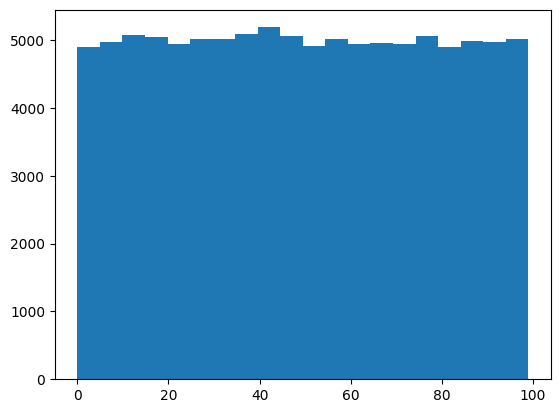

In [5]:
r = np.random.randint(0, 100, 100000)
plt.hist(r, bins=20)